# Load the dataset

In [1]:
import pandas as pd
data=pd.read_csv("Reviews 2.csv")

## Inspect the dataset structure and features

In [2]:
data.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [3]:
data.shape

(568454, 10)

## Creating Sentiment Labels from Scores

In [4]:
def partition(x):
  if x < 3 :
    return 0 
  return 1


data['Sentiment'] = data['Score'].apply(partition)
print(data['Sentiment'].shape)
print(data.head(3))

(568454,)
   Id   ProductId          UserId                      ProfileName  \
0   1  B001E4KFG0  A3SGXH7AUHU8GW                       delmartian   
1   2  B00813GRG4  A1D87F6ZCVE5NK                           dll pa   
2   3  B000LQOCH0   ABXLMWJIXXAIN  Natalia Corres "Natalia Corres"   

   HelpfulnessNumerator  HelpfulnessDenominator  Score        Time  \
0                     1                       1      5  1303862400   
1                     0                       0      1  1346976000   
2                     1                       1      4  1219017600   

                 Summary                                               Text  \
0  Good Quality Dog Food  I have bought several of the Vitality canned d...   
1      Not as Advertised  Product arrived labeled as Jumbo Salted Peanut...   
2  "Delight" says it all  This is a confection that has been around a fe...   

   Sentiment  
0          1  
1          0  
2          1  


In [5]:
data[data.duplicated(subset = [ 'ProductId', 'ProfileName', 'Score', 'Time', 'Summary'], keep = False)]

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,Sentiment
466,467,B000G6RYNE,A3PJZ8TU8FDQ1K,Jared Castle,0,0,5,1231718400,"One bite and you'll become a ""chippoisseur""","I'm addicted to salty and tangy flavors, so wh...",1
574,575,B000G6RYNE,A3PJZ8TU8FDQ1K,Jared Castle,2,2,5,1231718400,"One bite and you'll become a ""chippoisseur""","I'm addicted to salty and tangy flavors, so wh...",1
1084,1085,B0030N5K1I,A19U4T4I7UZGNM,3 dogs,3,3,1,1330992000,awful,"This is not jerky, this is processed, hard lik...",0
1087,1088,B0030N5K1I,A19U4T4I7UZGNM,3 dogs,1,1,1,1330992000,awful,"This is not jerky, this is processed, hard lik...",0
2630,2631,B0016FY6H6,A2NLZ3M0OJV9NX,Mark Bodzin,1,1,2,1313107200,Way too weak for my tastes,"What can i say, I love iced tea. I drink a lot...",0
...,...,...,...,...,...,...,...,...,...,...,...
568007,568008,B0030VJ8YU,A20P8VC55KPPCT,FL Mom,3,3,5,1274486400,These pouches are great!,These pouches are so easy and convenient. They...,1
568008,568009,B0030VJ8YU,ATIHDHZYNQ0EI,"Kristen O'donnell ""twinsmom""",3,3,5,1270425600,Organic and Tasty!,I have 12 month olds and no time to write a gr...,1
568017,568018,B0030VJ8YU,A20P8VC55KPPCT,FL Mom,2,2,5,1274486400,These pouches are great!,These pouches are so easy and convenient. They...,1
568034,568035,B0030VJ8YU,A1S6HK2R1KUC5E,data1701,1,1,5,1318291200,Triplets love this!,This is very smooth and easy to feed to my tri...,1


In [6]:
data[data.duplicated(subset = [ 'ProductId', 'ProfileName', 'Score', 'Time', 'Summary'], keep = False)].loc[data.ProductId == 'B005K4Q1VI', :]
     

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,Sentiment
3306,3307,B005K4Q1VI,A3OXHLG6DIBRW8,"C. F. Hill ""CFH""",24,25,5,1321401600,Really Good Hot Cocoa - Highly Recommended,These Grove Square Hot Cocoa flavors are by fa...,1
3416,3417,B005K4Q1VI,A3OXHLG6DIBRW8,"C. F. Hill ""CFH""",5,5,5,1321401600,Really Good Hot Cocoa - Highly Recommended,These Grove Square Hot Cocoa flavors are by fa...,1


## Data Cleaning

Sorting data according to ProductId in ascending order

     

In [7]:
sorted_data=data.sort_values('ProductId', axis=0, ascending=True, inplace=False, kind='quicksort', na_position='last')

Deduplication of entries


In [8]:
final=sorted_data.drop_duplicates(subset={"UserId","ProfileName","Time","Text"}, keep='first', inplace=False)
final.shape

(393933, 11)

In [9]:
final[final['HelpfulnessNumerator'] > final['HelpfulnessDenominator']]

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,Sentiment
64421,64422,B000MIDROQ,A161DK06JJMCYF,"J. E. Stephens ""Jeanne""",3,1,5,1224892800,Bought This for My Son at College,My son loves spaghetti so I didn't hesitate or...,1
44736,44737,B001EQ55RW,A2V0I904FH7ABY,Ram,3,2,4,1212883200,Pure cocoa taste with crunchy almonds inside,It was almost a 'love at first bite' - the per...,1


In [10]:
final = final[final['HelpfulnessNumerator'] <= final['HelpfulnessDenominator']]
final.reset_index(inplace=True)
final.shape

(393931, 12)

### Preprocessing

In [11]:
import re
import string
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer

from gensim.models import Word2Vec
from gensim.models import KeyedVectors
import pickle

from tqdm import tqdm
import os

from bs4 import BeautifulSoup

In [12]:
import re

def decontracted(phrase):
    # specific
    phrase = re.sub(r"won't", "will not", phrase)
    phrase = re.sub(r"can\'t", "can not", phrase)

    # general
    phrase = re.sub(r"n\'t", " not", phrase)
    phrase = re.sub(r"\'re", " are", phrase)
    phrase = re.sub(r"\'s", " is", phrase)
    phrase = re.sub(r"\'d", " would", phrase)
    phrase = re.sub(r"\'ll", " will", phrase)
    phrase = re.sub(r"\'t", " not", phrase)
    phrase = re.sub(r"\'ve", " have", phrase)
    phrase = re.sub(r"\'m", " am", phrase)
    return phrase

In [13]:
stopwords= set(['br', 'the', 'i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've",\
            "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', \
            'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their',\
            'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', \
            'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', \
            'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', \
            'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after',\
            'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further',\
            'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more',\
            'most', 'other', 'some', 'such', 'only', 'own', 'same', 'so', 'than', 'too', 'very', \
            's', 't', 'can', 'will', 'just', 'don', "don't", 'should', "should've", 'now', 'd', 'll', 'm', 'o', 're', \
            've', 'y', 'ain', 'aren', "aren't", 'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn',\
            "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn',\
            "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn', "wasn't", 'weren', "weren't", \
            'won', "won't", 'wouldn', "wouldn't"])

combining all above step

In [14]:
 
from tqdm import tqdm
preprocessed_reviews = []
# tqdm is for printing the status bar
for sentance in tqdm(final['Text'].values):
    sentance = re.sub(r"http\S+", "", sentance)
    sentance = BeautifulSoup(sentance, 'lxml').get_text()
    sentance = decontracted(sentance)
    sentance = re.sub("\S*\d\S*", "", sentance).strip()
    sentance = re.sub('[^A-Za-z]+', ' ', sentance)
    # https://gist.github.com/sebleier/554280
    sentance = ' '.join(e.lower() for e in sentance.split() if e.lower() not in stopwords)
    preprocessed_reviews.append(sentance.strip())

  0%|                                                | 0/393931 [00:00<?, ?it/s]/var/folders/_r/gy9llnqn00xf95wzdgc7rv800000gn/T/ipykernel_13229/665170855.py:6: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  sentance = BeautifulSoup(sentance, 'lxml').get_text()
100%|█████████████████████████████████| 393931/393931 [01:05<00:00, 5991.03it/s]


In [15]:
preprocessed_reviews[1]

'fun way children learn months year learn poems throughout school year like handmotions invent poem'

In [16]:
preprocessed_reviews[15000]

'catnip cute usable size larger expected catnip came clear plastic bag tied opening inside good amount cats went crazy'

In [17]:
len(preprocessed_reviews)

393931

## Distribution of Review Scores

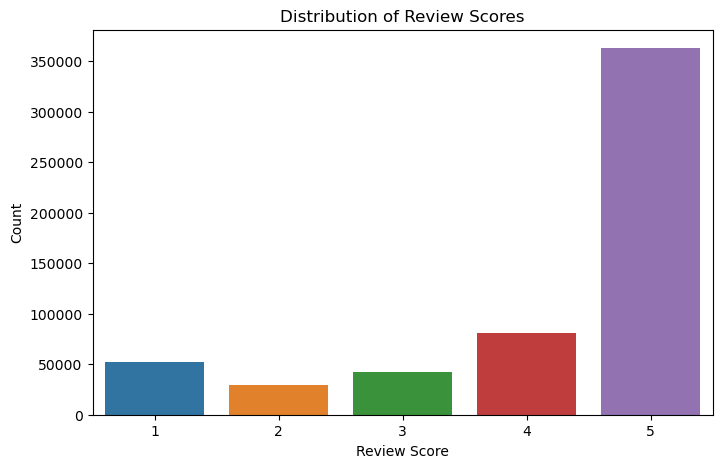

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 5))
sns.countplot(x='Score', data=data)
plt.title('Distribution of Review Scores')
plt.xlabel('Review Score')
plt.ylabel('Count')
plt.show()

## Feature Engineering

In [19]:
sample_data = final.sample(n = 5000)
sample_data.head()

,index,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,Sentiment
290689,99417,99418,B003E1VO20,A1VR19MXSKJY30,paintedlady,0,0,5,1316563200,Simply Addicting,"I was in a grocery store, which must have been...",1
234851,521943,521944,B001UOWA3K,A6AAXJE45M1NC,camperlady,0,0,5,1334275200,Bottarga di Muggine,Leave it to the Italians to think of a way to ...,1
63258,525264,525265,B000F3Q4AM,A1NN9JCV4CPG5B,Louise,2,2,5,1222992000,Fresh and flavorful,"<a href=""http://www.amazon.com/gp/product/B000...",1
147726,399064,399065,B001225K5U,A189YSBDTG134L,Re,0,0,3,1349395200,Missing,"Interesting, my case only has 88 dressing pack...",1
293743,141790,141791,B003GTR8IO,A3FBM0RMCMAABV,Penguin Chick,0,0,2,1292371200,No vanilla taste.,I really thought this would be delicious. Sta...,0


In [20]:
sample_data.drop(columns = ['Id', 'ProductId', 'UserId','ProfileName', 'Time', 'Summary', 'Score'], inplace=True)
     
sample_data.head(2)

,index,HelpfulnessNumerator,HelpfulnessDenominator,Text,Sentiment
290689,99417,0,0,"I was in a grocery store, which must have been...",1
234851,521943,0,0,Leave it to the Italians to think of a way to ...,1


In [21]:
sample_reviews = [ preprocessed_reviews[i] for i in sample_data.index.values]
sample_reviews[0]

'grocery store must mars purchased tin altoid smalls simply mint truly addicting bought another mars cannot find anywhere find way back mars ecstatic popped amazon'

In [22]:
sample_data['preprocessed'] = sample_reviews
sample_data.head()

,index,HelpfulnessNumerator,HelpfulnessDenominator,Text,Sentiment,preprocessed
290689,99417,0,0,"I was in a grocery store, which must have been...",1,grocery store must mars purchased tin altoid s...
234851,521943,0,0,Leave it to the Italians to think of a way to ...,1,leave italians think way make something delici...
63258,525264,2,2,"<a href=""http://www.amazon.com/gp/product/B000...",1,
147726,399064,0,0,"Interesting, my case only has 88 dressing pack...",1,interesting case dressing packets got today wo...
293743,141790,0,0,I really thought this would be delicious. Sta...,0,really thought would delicious starbucks coffe...


In [23]:
sample_data.drop(columns = ['Text', 'index'], inplace=True)
     
sample_data.head(3)

,HelpfulnessNumerator,HelpfulnessDenominator,Sentiment,preprocessed
290689,0,0,1,grocery store must mars purchased tin altoid s...
234851,0,0,1,leave italians think way make something delici...
63258,2,2,1,


## Train-Test Split

In [24]:
from sklearn.model_selection import train_test_split
y = sample_data['Sentiment'].values 
X = sample_data.drop(columns =['Sentiment'])

print(X.shape)
print(y.shape)

(5000, 3)
(5000,)


In [25]:
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size = 0.2, random_state = 24)

print(train_X.shape)
print(train_y.shape)
print(test_X.shape)
print(test_y.shape)

(4000, 3)
(4000,)
(1000, 3)
(1000,)


## Vectorizing Text Data

In [26]:
from sklearn.feature_extraction.text import CountVectorizer

count_vect = CountVectorizer()
count_vect.fit(train_X['preprocessed'])

print("some feature names ", count_vect.get_feature_names_out()[:10])
print('='*50)

some feature names  ['aa' 'aback' 'abandoned' 'abandoning' 'abilities' 'ability' 'able'
 'abominable' 'abomination' 'absence']


In [27]:
final_vectors = count_vect.transform(train_X['preprocessed'])
final_vectors.shape

(4000, 13268)

In [28]:
num_feats = train_X[['HelpfulnessNumerator' ,	'HelpfulnessDenominator']].values

from scipy import sparse

training_data = sparse.hstack(( num_feats, final_vectors))

training_data.shape

(4000, 13270)

## Model Selection

In [29]:
from sklearn.linear_model import LogisticRegression
     

## Model Training

In [30]:
model = LogisticRegression(max_iter = 15000)

model.fit(training_data, train_y)

LogisticRegression(max_iter=15000)

In [31]:
# predict on test datasets 

final_test_vectors = count_vect.transform(test_X['preprocessed'].values)
final_test_vectors.shape
     

(1000, 13268)

In [32]:
test_feats = test_X[['HelpfulnessNumerator' ,	'HelpfulnessDenominator']].values

test_data = sparse.hstack(( test_feats, final_test_vectors))

test_data.shape
     

(1000, 13270)

## Model Evaluation

In [33]:
from sklearn.metrics import accuracy_score

preds = model.predict(test_data)

# get the actual values 
y_true = test_y

accuracy_score(y_true, preds)
     

0.883

## Hyperparameter Tuning

In [34]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

# Define the parameter grid
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],  # Regularization strength
    'solver': ['liblinear', 'saga'],  # Optimization algorithm
    'max_iter': [100, 500, 1000, 15000]  # Maximum number of iterations
}

# Initialize the model
log_reg = LogisticRegression()

# Initialize GridSearchCV
grid_search = GridSearchCV(log_reg, param_grid, cv=5, scoring='accuracy')

# Fit the model
grid_search.fit(training_data, train_y)

# Output the best parameters and score
print("Best Parameters:", grid_search.best_params_)
print("Best Cross-Validation Score:", grid_search.best_score_)


/opt/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max

Best Parameters: {'C': 10, 'max_iter': 15000, 'solver': 'saga'}
Best Cross-Validation Score: 0.89175


In [35]:
# Get the best model
best_model = grid_search.best_estimator_

# Predict on the test data
preds = best_model.predict(test_data)

# Evaluate the model
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

accuracy = accuracy_score(test_y, preds)
print("Test Accuracy:", accuracy)
print("Classification Report:\n", classification_report(test_y, preds))
print("Confusion Matrix:\n", confusion_matrix(test_y, preds))


Test Accuracy: 0.875
Classification Report:
               precision    recall  f1-score   support

           0       0.65      0.39      0.49       152
           1       0.90      0.96      0.93       848

    accuracy                           0.88      1000
   macro avg       0.77      0.68      0.71      1000
weighted avg       0.86      0.88      0.86      1000

Confusion Matrix:
 [[ 60  92]
 [ 33 815]]


## Save best model

In [37]:
from joblib import dump, load
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression

# Save the best model
dump(best_model, 'best_logistic_regression_model.joblib')
oblib.dump(count_vect, 'final_vectors.joblib')


# Later, to load the model
loaded_model = load('best_logistic_regression_model.joblib')


# Use the loaded model for predictions
preds = loaded_model.predict(test_data)


In [39]:
# Example code to save your model and vectorizer
import joblib
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression

# Assuming `model` is your trained Logistic Regression model
# and `count_vect` is your trained CountVectorizer
joblib.dump(model, 'best_logistic_regression_model.joblib')
joblib.dump(count_vect, 'final_vectors.joblib')


['final_vectors.joblib']